# Analisi Costi Servizi Regioni



In [2]:
import numpy as np
import pandas as pd

# set the max number of columns to display
pd.options.display.max_columns = 98

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import plotly.offline as py
import plotly.plotly as py_on
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from IPython.display import Image
from IPython.display import display

In [3]:
df = pd.read_csv('./data/opencivitas_spesa_storica_dati_irpef.csv')
df.shape

(26799, 86)

## Quali sono i costi medi/cittadino per regione per l'erogazione dei servizi primari?

Dati i serivizi primari:

- entrate tributarie
- ufficio tecnico
- anagrafe, stato civile, leva e servizio statistico
- altri servizi generali
- polizia locale
- istruzione pubblica
- viabilita'
- trasporto pubblico e servizi connessi
- gestione del territorio
- ambiente
- settore sociale
- asili nido

i grafici sotto mostrano i costi per servizio nelle varie regioni mediati per il periodo 2010-2013

In [4]:
#group by Regione
df_regioni = df.groupby(["Regione"]).sum()

# select the columns
dimensioni = ['tot_contribuenti']
costi_columns = [c for c in df.columns if c.startswith('costo')]
costi_columns.remove('costo spesa totale')

#apply the selection
df_costi = df_regioni[dimensioni + costi_columns]

# divide the cost values for the number of tax payers
df_costi_medi = df_costi.copy()
df_costi_medi[costi_columns] = df_costi_medi[costi_columns].div(df_costi_medi['tot_contribuenti'], axis='index')

df_costi_medi = df_costi_medi.drop('tot_contribuenti', axis=1)
df_costi_medi['costo spesa totale'] = df_costi_medi[costi_columns].sum(axis=1)
df_costi_medi = df_costi_medi.sort_values('costo spesa totale')

costi_columns.append('costo spesa totale')
df_costi_medi

,costo riscossione tributi,costo ufficio tecnico,"costo anagrafe, stato civile",costo altri servizi,costo polizia locale,costo istruzione,costo viabilita',costo trasporti,costo territorio,costo ambiente,costo sociale,costo asili nido,costo spesa totale
Regione,,,,,,,,,,,,,
VENETO,11.066791,31.689799,14.759061,146.247591,48.675780,84.650250,61.381176,11.209525,39.664089,184.865224,126.965655,20.998212,782.173155
MOLISE,20.629573,39.344185,21.319472,193.085556,54.367638,72.233437,79.765573,7.207589,60.224729,155.110850,80.982240,10.013914,794.284756
MARCHE,14.551420,29.808208,15.472993,153.112484,51.647383,81.687737,77.512617,7.131765,41.818966,193.447908,129.452846,25.789938,821.434265
CALABRIA,20.452651,38.135488,23.950141,186.910380,61.628680,71.739269,80.749484,2.206211,55.836742,209.060655,77.129278,2.225974,830.024954
PUGLIA,18.677372,21.928073,16.793989,140.794487,70.843484,64.332549,52.563186,15.645182,41.063315,251.067461,130.372860,14.812705,838.894661
LOMBARDIA,14.825448,24.349360,15.088572,152.969375,67.936720,116.808578,62.903171,19.875902,39.496424,181.164853,146.968808,32.488596,874.875806
PIEMONTE,15.200880,32.801388,17.802954,154.332304,74.276349,102.968546,77.454220,6.473341,36.469002,213.014395,128.657229,27.366327,886.816935
UMBRIA,14.420277,27.998540,14.468847,176.443050,58.753779,80.047587,73.495909,33.844629,57.403077,238.708006,103.746107,30.663450,909.993258
BASILICATA,15.401712,46.817467,22.482263,187.699284,63.287966,90.883341,68.572758,33.047221,54.215608,201.299996,120.613182,12.092843,916.413642


La tabella mostra come la regione con in costi piu' bassi in base al numero dei contribuenti sia il **Veneto** mentre quella con i costi piu' alti sia il **Lazio**.

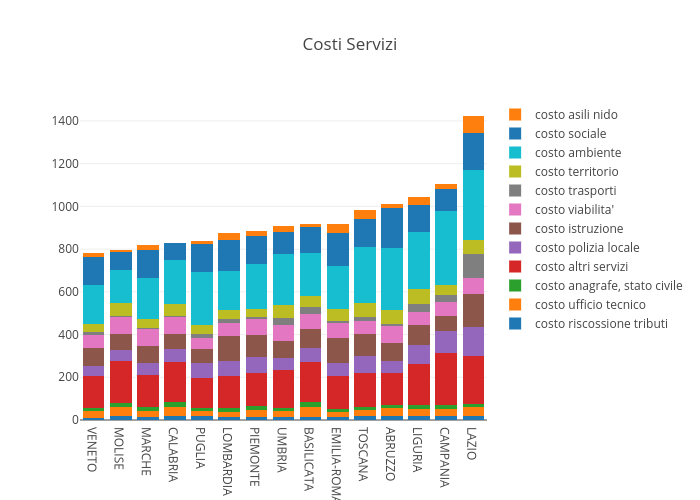

In [6]:
data = []

for c in df_costi_medi.columns[:-1]:
    trace = go.Bar(
        x = df_costi_medi.index.values,
        y = df_costi_medi[c],
        name = c
    )
    data.append(trace)

layout = go.Layout(
    barmode='stack',
    title = 'Costi Servizi'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# path = py.plot(fig, include_plotlyjs=True, auto_open=False)
# from IPython.core.display import HTML
# with open(path.replace('file://',''),'r') as f:
#     h = HTML(f.read())
# display(h)

fig_path = 'imgs/costi_servizi.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)

Da questo bar chart possiamo osservare come la Regione piu' costosa sia il Lazio mentre quella piu' economica sia il Veneto. Nel grafico interattivo possiamo deselezionare le varie voci dalla legenda e analizzare i costi in dettaglio.

E' interessante notare che per:

1. i **Tributi Lazio**, Molise e Calabria sono le Regioni con maggiore costo
2. Per il **Sociale** l'Abruzzo e la Regione con i costi maggiori seguita dal Lazio
3. Per gli **Asili Nido** il Lazio ha un coso per contribuente doppio rispetto alle altre Regioni
4. per **l'Ambiente** Lazio e Campania sono le Regioni con costi maggiori
5. per i **Trasporti** il Lazio spende il doppio delle altre Regioni
6. per la **Polizia Locale** il Lazio e' seguito dalla Campania come costi.

A questo punto sarebbe interessante fare una analisi di dettaglio per capire quali sono le province con i costi maggiori nel Lazio.

In [8]:
def analisi_provincia(df, name):
    df_regione = df[df['Regione'] == name]

    #group by Provincia
    df_regione_prov = df_regione.groupby(["Provincia"]).sum()

    # select the columns
    dimensioni = ['tot_contribuenti']
    costi_columns = [c for c in df.columns if c.startswith('costo')]
    costi_columns.remove('costo spesa totale')

    # #apply the selection
    df_regione_prov = df_regione_prov[costi_columns + dimensioni]

    # divide the cost values for the number of tax payers
    df_regione_prov_media = df_regione_prov.copy()
    df_regione_prov_media[costi_columns] = df_regione_prov_media[costi_columns].div(df_regione_prov_media['tot_contribuenti'], axis='index')

    df_regione_prov_media = df_regione_prov_media.drop('tot_contribuenti', axis=1)
    df_regione_prov_media['costo spesa totale'] = df_regione_prov_media[costi_columns].sum(axis=1)
    df_regione_prov_media = df_regione_prov_media.sort_values('costo spesa totale')

    costi_columns.append('costo spesa totale')
    return df_regione_prov_media

## Analisi Costi per il Lazio

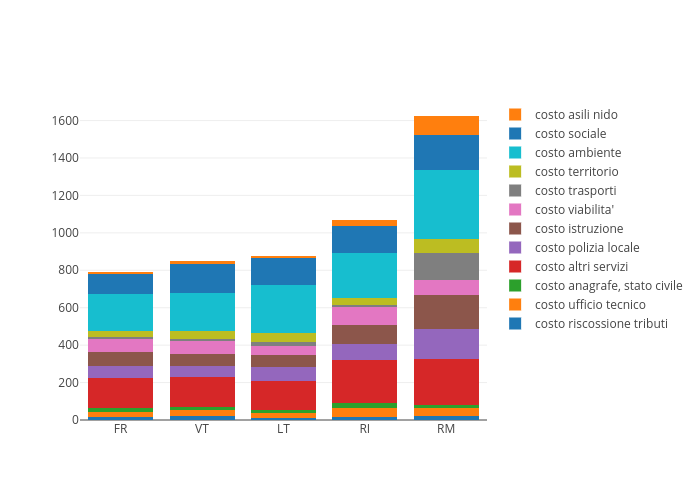

In [9]:
df_lazio = analisi_provincia(df,'LAZIO')

data = []

for c in df_lazio.columns[:-1]:
    trace = go.Bar(
        x = df_lazio.index.values,
        y = df_lazio[c],
        name = c,
    )
    data.append(trace)

layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

fig_path = 'imgs/costi_servizi_lazio.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)

Si puo' notare come la provincia di Roma sia quelle che contribuisce maggiormente come costi.


## Analisi Costi per il Lombardia

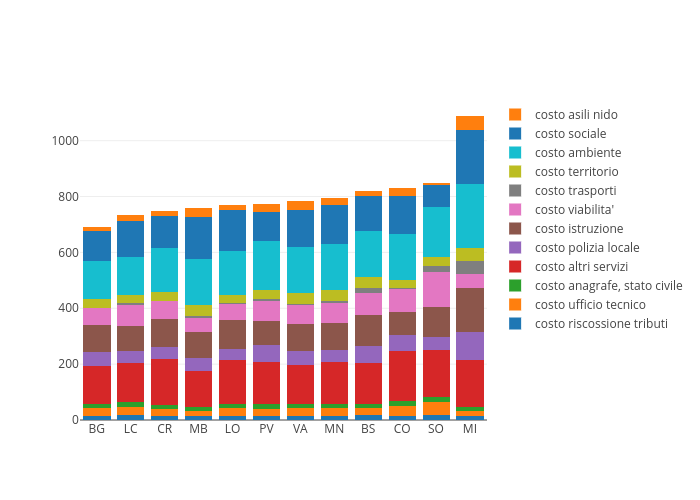

In [10]:
df_lombardia = analisi_provincia(df, 'LOMBARDIA')
data = []

for c in df_lombardia.columns[:-1]:
    trace = go.Bar(
        x = df_lombardia.index.values,
        y = df_lombardia[c],
        name = c,
    )
    data.append(trace)

layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

fig_path = 'imgs/costi_servizi_lombardia.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)

In questo caso Milano e' la citta con costi piu' alti mentre Bergamo quella con costi piu' Bassi.